# APS 2 - Otimização pelo Vetor Gradiente

## Grupo: 5
## Participantes:

- Alexandre Wever
- Gabriel Mendes
- Lucca Hiratsuca Costa


# Importando bibliotecas

In [84]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Tarefa 1

### Considere a função f cuja lei f(x, y) será atribuída a seu grupo.

##### a) Construa o gráfico de f no GeoGebra e observe que f possui um único ponto de mínimo e não possui pontos de máximo.

<div style="text-align:center">
    <img src="./assets/tarefa1_questaoA.jpg" alt="tarefa1_questaoA" width="900" height="400"/>
</div>

##### b) Determine o vetor gradiente de fem um ponto genérico (x, y).

<div style="text-align:center">
    <img src="./assets/tarefa1_questaoB.jpg" alt="tarefa1_questaoB" width="800" height="400"/>
</div>

##### c) Usando as ideias desenvolvidas na página anterior, elabore um código que permita determinar o ponto de mínimo da função f. Utilize um passo fixo a = 0,1 e a estimativa inicial (xo, Yo) = (0,0). A precisão do cálculo deverá ser de 10-5

In [85]:
def f(x, y):
    """Define a função f(x, y)."""
    return x**2 + x*y + 4*y**2 + x + y

def grad_f(x, y):
    """Calcula o gradiente da função no ponto (x, y)."""
    df_dx = 2*x + y + 1
    df_dy = x + 8*y + 1
    return np.array([df_dx, df_dy])

def gradient_descent(function, grad, initial_point, step_size, precision):
    """Executa o método do gradiente descendente para encontrar o ponto de mínimo da função especificada."""
    current_point = np.array(initial_point)
    difference = np.inf
    steps = 0

    while difference > precision:
        previous_point = current_point
        current_point = current_point - step_size * grad(*current_point)
        difference = np.abs(function(*current_point) - function(*previous_point))
        steps += 1

    return current_point, steps

# Parâmetros do algoritmo
initial_point = (0, 0)
step_size = 0.1
precision = 1e-5

# Executa o algoritmo
min_point, steps = gradient_descent(f, grad_f, initial_point, step_size, precision)
z_min = f(*min_point)
min = (*min_point, z_min)

print(f"Minimum point: {min}, reached in {steps} steps.")


Minimum point: (-0.46250571330191653, -0.06734189644276807, -0.26665033899236973), reached in 23 steps.


##### d) Repita o procedimento para os seguintes valores do passo: a = 0,15, a = 0,2, a = 0,3 e a = 0,5.

In [86]:
alphas = [0.15, 0.2, 0.3, 0.5]
initial_point = (0, 0)  # Ponto inicial
precision = 1e-5  # Precisão

# Testando diferentes valores de alpha
for alpha in alphas:
    min_point, steps = gradient_descent(f, grad_f, initial_point, alpha, precision)
    z_min = f(*min_point)
    min = (*min_point, z_min)

    print(f"Alpha: {alpha}, Minimum point: {min}, Number of steps: {steps}")


Alpha: 0.15, Minimum point: (-0.4641161580836166, -0.06708055722590127, -0.26666053198247813), Number of steps: 16
Alpha: 0.2, Minimum point: (-0.46475520000000003, -0.06639360000000002, -0.2666621927424), Number of steps: 12
Alpha: 0.3, Minimum point: (1.6178209494833905e+153, 9.969461895153895e+153, inf), Number of steps: 962
Alpha: 0.5, Minimum point: (5.789639271493776e+153, 3.5677364743159627e+154, inf), Number of steps: 318


/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_77858/724991345.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return x**2 + x*y + 4*y**2 + x + y
/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_77858/724991345.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  difference = np.abs(function(*current_point) - function(*previous_point))
/var/folders/0b/t7v75s011nxd0q97zmc5_fm80000gn/T/ipykernel_77858/724991345.py:3: RuntimeWarning: overflow encountered in scalar power
  return x**2 + x*y + 4*y**2 + x + y


Assim como podemos observar, para os valores de $\alpha$: 0,3 e 0,5, o resultado acabou resultando em `overflow`.

**O que isso significa?**

Quando o tamanho do passo é grande (como 0.3 ou 0.5 neste caso), a atualização do ponto atual no método do gradiente descendente pode levar a um ponto muito distante do ponto anterior, o que acaba causando instabilidade no algoritmo.

Devido a esses grandes passos, o ponto atual pode "pular" sobre o mínimo e se mover cada vez mais longe dele. Em vez de convergir para o mínimo, os valores de $x$ e $y$ crescem exponencialmente.

Ou seja, à medida que $x$ e $y$ crescem exponencialmente, a função: $f(x, y)$ e suas derivadas também crescem exponencialmente, eventualmente atingindo valores que são demasiado grandes para serem representados na memória do computador. 

E, isso resulta em um "overflow", onde os valores são tão grandes que são considerados infinitos ou indeterminados.

# Tarefa 2

##### Utilize o seu código para determinar os pontos de mínimo da função g, cuja lei g(x, y) será atribuída a seu grupo. 

A função g possui dois pontos de mínimo. No relatório, deverá aparecer:

- os dois pontos de mínimo obtidos com seu código;
- o que foi modificado no programa para obter o segundo ponto de mínimo;
- o comportamento do processo de convergência para diferentes valores do passo.

<div style="text-align:center">
    <img src="./assets/tarefa2.jpg" alt="tarefa2" width="800" height="300"/>
</div>

Acima, foi plotado no Geogebra a função $g(x, y)$ para termos uma ideia e para termos uma noção de como ela se comporta e uma estimativa dos valores dos pontos de mínimo que devem ser encontrados.

In [87]:
def g(x1, x2):
    """Define a função g(x1, x2)."""
    return np.sqrt(x1**2 + x2**2 + 2) + x1**2 * np.exp(-x2**2) + (x1 - 3)**2

def grad_g(x1, x2):
    """Calcula o gradiente da função no ponto (x1, x2)."""
    dg_dx1 = (x1 / np.sqrt(x1**2 + x2**2 + 2)) + 2*x1*np.exp(-x2**2) + 2*(x1 - 3)
    dg_dx2 = (x2 / np.sqrt(x1**2 + x2**2 + 2)) - 2*x1**2*x2*np.exp(-x2**2)
    return np.array([dg_dx1, dg_dx2])

def gradient_descent(function, grad, initial_points, step_size, precision):
    """Executa o método do gradiente descendente para encontrar os pontos de mínimo da função especificada."""
    minima = []

    for initial_point in initial_points:
        current_point = np.array(initial_point)
        difference = np.inf
        steps = 0

        while difference > precision:
            previous_point = current_point
            current_point = current_point - step_size * grad(*current_point)
            difference = np.abs(function(*current_point) - function(*previous_point))
            steps += 1

        minima.append((current_point, steps))

    return minima

# Parâmetros do algoritmo
initial_points = [(-10, -10), (10, 10)]
step_size = 0.1
precision = 1e-5

# Executa o algoritmo
minima = gradient_descent(g, grad_g, initial_points, step_size, precision)
minima_info = [(point, g(*point), steps) for point, steps in minima]

for point, value, steps in minima_info:
    print(f"Minimum point: {point}, Function value: {value}, Reached in {steps} steps.")


Minimum point: [ 2.58367765 -1.96659132], Function value: 3.8545048561043367, Reached in 117 steps.
Minimum point: [2.58372946 1.96665774], Function value: 3.854505532892432, Reached in 118 steps.


**O que foi modificado no programa para obter o segundo ponto de mínimo?**

- Modificação no Método Gradient Descent: O método 'gradient_descent foi adaptado para aceitar múltiplos pontos iniciais. Isso permite que o algoritmo explore diferentes regiões do espaço de entrada para encontrar múltiplos pontos de mínimo.
- Alteração nos Parâmetros Iniciais: Foram utilizados diferentes pontos iniciais, `initial_points = [(-10, -10), (10, 10)] `. Isso permite que o algoritmo de descida do gradiente comece a busca em diferentes locais no espaço da função.
- Armazenamento de Múltiplos Mínimos: O algoritmo foi alterado para retornar uma lista de mínimos encontrados a partir dos diferentes pontos iniciais. Cada mínimo é acompanhado pelo número de passos necessários para alcançá-lo.

Essas modificações permitem que o algoritmo explore de forma mais abrangente o espaço da função g(x1, x2) e encontre múltiplos pontos de mínimo, contrastando com a abordagem anterior que focava em encontrar um único mínimo para a função f(x, y)'.

##### O comportamento do processo de convergência para diferentes valores do passo:

Os resultados em relação ao passo são de que: 
- Quanto menor o passo, maior é o número de vezes que o $while$ roda e com isso, tendo um resultado mais preciso. Ou seja, há um maior número de iterações.
- Por outro lado, com um passo maior, o número de iterações é menor, porém, o resultado que alcançamos é menos preciso e, dependendo do valor do passo, pode até resultar em um overflow (como visto anteriormente), devido ao tamanho do passo.

# Tarefa 3

##### Utilize o seu código para determinar os dois pontos de máximo da função h, cuja lei h(x,y) será atribuída a seu grupo. No relatório, indique os dois pontos de máximo obtidos com seu código.

<div style="text-align:center">
    <img src="./assets/tarefa3.jpg" alt="tarefa3" width="1000" height="500"/>
</div>

Da mesma forma que na tarefa 2, foi plotado no Geogebra a função $h(x, y)$ para termos uma ideia e para termos uma noção de como ela se comporta e uma estimativa dos valores dos pontos de máximo que devem ser encontrados.

In [88]:
def h(x, y):
    """Define a função h(x, y)."""
    return 4*np.exp(-x**2 - y**2) + 3*np.exp(-x**2 - y**2 + 4*x + 6*y - 13) - x**2/8 - y**2/14 + 2

def grad_h(x, y):
    """Calcula o gradiente da função no ponto (x, y)."""
    dh_dx = -8*x*np.exp(-x**2 - y**2) - 6*x*np.exp(-x**2 - y**2 + 4*x + 6*y - 13) - x/4 + 12*np.exp(-x**2 - y**2 + 4*x + 6*y - 13)
    dh_dy = -8*y*np.exp(-x**2 - y**2) - 6*y*np.exp(-x**2 - y**2 + 4*x + 6*y - 13) - y/7 + 18*np.exp(-x**2 - y**2 + 4*x + 6*y - 13)
    return np.array([dh_dx, dh_dy])

def gradient_ascent(function, grad, initial_points, step_size, precision):
    """Executa o método do gradiente ascendente para encontrar os pontos de máximo da função especificada."""
    maxima = []

    for initial_point in initial_points:
        current_point = np.array(initial_point)
        difference = np.inf
        steps = 0

        while difference > precision:
            previous_point = current_point
            current_point = current_point + step_size * grad(*current_point)
            difference = np.abs(function(*current_point) - function(*previous_point))
            steps += 1

        maxima.append((current_point, steps))

    return maxima

# Parâmetros do algoritmo
initial_points = [(-10, -10), (10, 10)]  # Escolhemos dois pontos iniciais arbitrários
step_size = 0.0001
precision = 1e-5

# Executa o algoritmo
maxima = gradient_ascent(h, grad_h, initial_points, step_size, precision)
maxima_info = [(point, h(*point), steps) for point, steps in maxima]

for point, value, steps in maxima_info:
    print(f"Maximum point: {point}, Function value: {value}, Reached in {steps} steps.")


Maximum point: [-0.00996705 -0.03751632], Function value: 5.993869515841805, Reached in 123697 steps.
Maximum point: [1.93361297 2.97956814], Function value: 3.8840861904994943, Reached in 61943 steps.


Se observarmos os valores encontrados pela função e compararmos com a imagem, podemos ver que os valores encontrados são quase os mesmos! Em outras palavras, nossa estimativa foi bem próxima do valor real.

# Tarefa Bônus

##### Faça uma pesquisa sobre a utilização de passo variável e implemente o método no seu código para calcular o ponto de mínimo da função f da Tarefa 1. Compare o número de iterações necessárias até a convergência nos dois casos.

Primeiramente, vamos entender o que é o passo variável:

O passo variável, no contexto de algoritmos de otimização como o gradiente descendente, refere-se à adaptação dinâmica do tamanho do passo (também conhecido como taxa de aprendizado) em cada iteração do algoritmo. Diferentemente de um passo fixo, onde o tamanho do passo permanece constante ao longo de todas as iterações, um passo variável ajusta-se de acordo com certas condições ou critérios para melhorar a eficiência do algoritmo.

Esse possui algumas características como:

- **Ajuste Dinâmico:** O tamanho do passo é modificado a cada iteração com base na resposta da função objetivo ou nas propriedades do gradiente.

- **Eficiência de Convergência:** Algoritmos com passo variável frequentemente convergem mais rápido que aqueles com passo fixo, especialmente em funções complexas ou com gradientes que mudam rapidamente.
- **Métodos de Ajuste:** Existem várias estratégias para ajustar o tamanho do passo, como:
    - Backtracking Line Search: Reduz o passo até que uma redução suficiente na função seja alcançada.
    
    - Condição de Armijo: Uma condição específica que avalia se o decréscimo na função é proporcional ao tamanho do passo e ao quadrado da norma do gradiente.
    - Como o AdaGrad, RMSprop, e Adam, comuns em aprendizado de máquina, que ajustam o passo com base em propriedades estatísticas dos gradientes.

- **Estabilidade e precisão:** Ajustar o passo pode ajudar a evitar passos muito grandes, que podem levar a instabilidades ou oscilações, e passos muito pequenos, que podem causar lentidão na convergência.

- **Dependência do problema:** A eficácia de um passo variável pode depender fortemente da natureza específica da função objetivo e do espaço de soluções.


Em suma, a utilização de um passo variável é uma técnica avançada em otimização que pode significativamente melhorar a performance de algoritmos de gradiente descendente, especialmente em cenários onde a topologia da função objetivo é complexa ou quando se deseja uma convergência mais rápida e estável.


In [89]:
def f(x, y):
    """Define a função f(x, y)."""
    return x**2 + x*y + 4*y**2 + x + y

def grad_f(x, y):
    """Calcula o gradiente da função no ponto (x, y)."""
    df_dx = 2*x + y + 1
    df_dy = x + 8*y + 1
    return np.array([df_dx, df_dy])

def gradient_descent(function, grad, initial_point, initial_step_size, precision, armijo_constant=0.5, reduction_factor=0.5):
    """Executa o método do gradiente descendente com passo variável para encontrar o ponto de mínimo da função especificada."""
    current_point = np.array(initial_point)
    step_size = initial_step_size
    difference = np.inf
    steps = 0

    while difference > precision:
        previous_point = current_point
        gradient = grad(*current_point)
        current_point = current_point - step_size * gradient
        while function(*current_point) > function(*previous_point) - armijo_constant * step_size * np.dot(gradient, gradient):
            step_size *= reduction_factor
            current_point = previous_point - step_size * gradient
        difference = np.abs(function(*current_point) - function(*previous_point))
        steps += 1

    return current_point, steps

# Parâmetros do algoritmo
initial_point = (0, 0)
initial_step_size = 1.0
precision = 1e-5

# Executa o algoritmo
min_point, steps = gradient_descent(f, grad_f, initial_point, initial_step_size, precision)
z_min = f(*min_point)
min = (*min_point, z_min)

print(f"Minimum point: {min}, reached in {steps} steps.")


Minimum point: (-0.46354845414328, -0.0671726828988696, -0.26665749707376896), reached in 19 steps.


Neste código, foi implementado o passo variável, ajustando o tamanho do passo (valendo inicialmente 1) e agora, a cada iteração, nós ajustamos esse valor baseado em algum critério. Nesse caso, com base na regra de Armijo, o qual ajusta o tamanho do passo para garantir que a função objetivo seja reduzida em uma quantidade suficiente.

Sabendo disso, o `step_size` é inicialmente definido para um valor maior (1.0), e a cada iteração, ele é reduzido multiplicativamente por `reduction_factor` até que a condição de Armijo seja satisfeita. 

Obs.: A constante de Armijo `armijo_constant` determina quão agressiva é a redução na função objetivo necessária para aceitar o novo ponto.

##### Compare o número de iterações necessárias até a convergência nos dois casos.

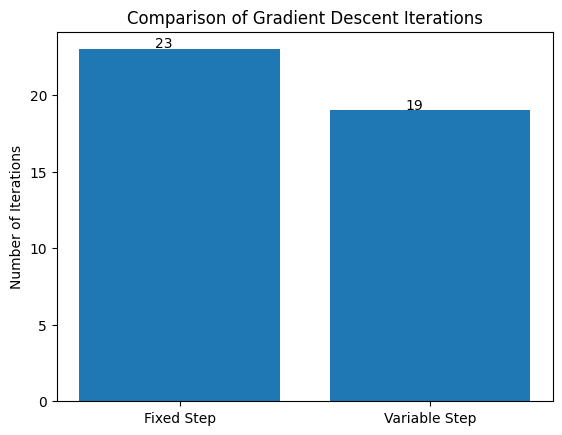

In [90]:
# Definição das funções f e grad_f
def f(x, y):
    return x**2 + x*y + 4*y**2 + x + y

def grad_f(x, y):
    df_dx = 2*x + y + 1
    df_dy = x + 8*y + 1
    return np.array([df_dx, df_dy])

# Método de gradiente descendente com passo fixo
def gradient_descent_fixed_step(function, grad, initial_point, step_size, precision):
    current_point = np.array(initial_point)
    difference = np.inf
    steps = 0

    while difference > precision:
        previous_point = current_point
        current_point = current_point - step_size * grad(*current_point)
        difference = np.abs(function(*current_point) - function(*previous_point))
        steps += 1

    return current_point, steps

# Método de gradiente descendente com passo variável
def gradient_descent_variable_step(function, grad, initial_point, initial_step_size, precision, armijo_constant=0.5, reduction_factor=0.5):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    difference = np.inf
    steps = 0

    while difference > precision:
        previous_point = current_point
        gradient = grad(*current_point)
        current_point = current_point - step_size * gradient
        while function(*current_point) > function(*previous_point) - armijo_constant * step_size * np.dot(gradient, gradient):
            step_size *= reduction_factor
            current_point = previous_point - step_size * gradient
        difference = np.abs(function(*current_point) - function(*previous_point))
        steps += 1

    return current_point, steps

# Parâmetros do algoritmo
initial_point = (0, 0)
fixed_step_size = 0.1
variable_initial_step_size = 1.0
precision = 1e-5

# Execução dos métodos
fixed_min_point, fixed_steps = gradient_descent_fixed_step(f, grad_f, initial_point, fixed_step_size, precision)
variable_min_point, variable_steps = gradient_descent_variable_step(f, grad_f, initial_point, variable_initial_step_size, precision)

# Plotando a comparação
plt.bar(['Fixed Step', 'Variable Step'], [fixed_steps, variable_steps])
plt.ylabel('Number of Iterations')
plt.title('Comparison of Gradient Descent Iterations')
for i, v in enumerate([fixed_steps, variable_steps]):
    plt.text(i - 0.1, v + 0.1, str(v))
plt.show()


Assim como dito anteriormente, quando temos um passo variável, o número de iterações é menor, pois o passo é ajustado de acordo com a resposta da função objetivo ou nas propriedades do gradiente. 

Com essa comparação mostrada no gráfico, podemos ver essa diferença de eficiência entre o passo fixo e o passo variável, dado que estamos utilizando a mesma função e os mesmos parâmetros e a única diferença é o tipo de passo.